# 城市气候与海洋的关系研究

导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

导入数据各个海滨城市数据

In [39]:
import glob

In [46]:
#获取指定目录下以csv结尾的文件
files=glob.glob('./*.csv')

In [47]:
cities=DataFrame()
for file in files:
    data=pd.read_csv(file)
    cities=cities.append(data)
cities.head()    

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315


In [2]:
import os
import re

def read_file(path):
    all_data=DataFrame()
    file_list=os.listdir(path)
    for filename in file_list:
        filepath=os.path.join(path,filename)
        if os.path.isfile(filepath) and re.search(r'\w+.csv',filename): 
#             print(pd.read_csv(filepath))
            all_data=all_data.append(pd.read_csv(filepath),ignore_index=True)
    return all_data             

In [37]:
all_data=read_file('./')
all_data['Unnamed: 0']=all_data.index
all_data=all_data.set_index('Unnamed: 0')
all_data

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
Unnamed: 0,,,,,,,,,,
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315
5,32.95,46,1016.0,few clouds,1436881329,2.10,110.000,Asti,2015-07-14 15:42:09,315
6,34.31,46,1015.0,few clouds,1436884929,2.10,100.000,Asti,2015-07-14 16:42:09,315
7,32.47,49,1015.0,few clouds,1436888513,2.10,100.000,Asti,2015-07-14 17:41:53,315
8,34.28,46,1015.0,few clouds,1436892132,1.50,100.000,Asti,2015-07-14 18:42:12,315


查看行数

In [4]:
all_data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            665, 666, 667, 668, 669, 670, 671, 672, 673, 674],
           dtype='int64', name='Unnamed: 0', length=675)

去除没用的列

In [5]:
all_data.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
Unnamed: 0,,,,,,,,,,
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315


各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [6]:
# all_data.loc[::,['city','dist']].drop_duplicates().set_index('city')

In [7]:
dist=all_data.groupby(by='city')[['dist']].max()
dist

,dist
city,
Asti,315
Bologna,71
Cesena,14
Faenza,37
Ferrara,47
Mantova,121
Milano,250
Piacenza,200
Ravenna,8


In [8]:
high_temp=all_data.groupby(by='city')[['temp']].max()
high_temp

,temp
city,
Asti,34.31
Bologna,33.85
Cesena,32.81
Faenza,32.74
Ferrara,33.43
Mantova,34.18
Milano,34.81
Piacenza,33.92
Ravenna,32.79


In [9]:
low_temp=all_data.groupby(by='city')[['temp']].min()
low_temp

,temp
city,
Asti,18.01
Bologna,18.44
Cesena,18.41
Faenza,18.62
Ferrara,18.81
Mantova,19.03
Milano,18.28
Piacenza,18.68
Ravenna,18.22


In [10]:
high_hum=all_data.groupby(by='city')[['humidity']].max()
high_hum

,humidity
city,
Asti,93
Bologna,92
Cesena,100
Faenza,100
Ferrara,85
Mantova,100
Milano,100
Piacenza,100
Ravenna,94


In [11]:
low_hum=all_data.groupby(by='city')[['humidity']].min()
low_hum

,humidity
city,
Asti,29
Bologna,40
Cesena,61
Faenza,61
Ferrara,39
Mantova,28
Milano,35
Piacenza,35
Ravenna,34


显示最高温度与离海远近的关系

In [12]:
tem_dist=high_temp.merge(dist,left_index=True,right_index=True)
tem_dist=tem_dist.set_index('dist')
tem_dist

,temp
dist,
315,34.31
71,33.85
14,32.81
37,32.74
47,33.43
121,34.18
250,34.81
200,33.92
8,32.79


Text(0, 0.5, 'high_tem/°C')

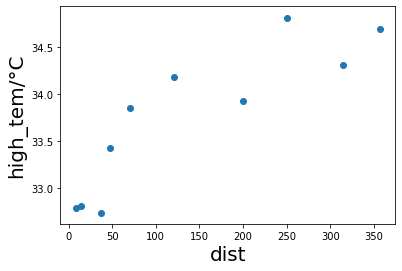

In [13]:
plt.scatter(tem_dist.index,tem_dist.values)
plt.xlabel('dist',fontdict=dict(fontsize=20))
plt.ylabel('high_tem/°C',fontdict=dict(fontsize=20))

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [14]:
faraway=tem_dist.loc[tem_dist.index<100]
faraway

,temp
dist,
71,33.85
14,32.81
37,32.74
47,33.43
8,32.79


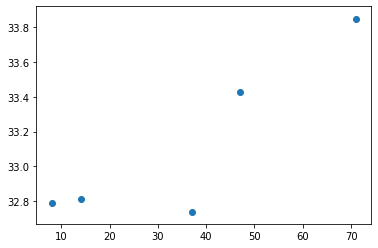

In [15]:
plt.scatter(faraway.index,faraway.values)

In [16]:
close=tem_dist.loc[tem_dist.index>50]
close

,temp
dist,
315,34.31
71,33.85
121,34.18
250,34.81
200,33.92
357,34.69


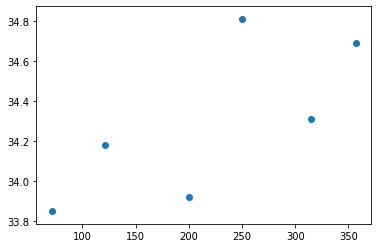

In [17]:
plt.scatter(close.index,close.values)

使用支持向量机计算回归参数

In [18]:
faraway.index.values

array([71, 14, 37, 47,  8], dtype=int64)

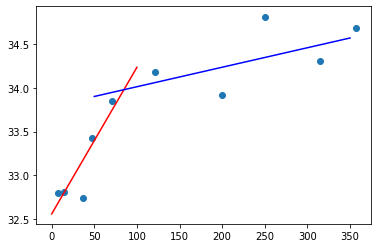

In [19]:
from sklearn.svm import SVR
#创建算法
svr1=SVR(kernel='linear')
svr2=SVR(kernel='linear')
#赋予数据
svr1.fit(faraway.index.values.reshape(-1,1),faraway.values.ravel())
svr2.fit(close.index.values.reshape(-1,1),close.values.ravel())
#预测数据

faraway_test=np.linspace(0,100,5).reshape((-1,1))
close_test=np.linspace(50,350,20).reshape((-1,1)) 

#预测结果
faraway_test_=svr1.predict(faraway_test)
close_test_=svr2.predict(close_test)
plt.scatter(dist,high_temp)
#画出预测的回归线
plt.plot(faraway_test,faraway_test_,'r')
plt.plot(close_test,close_test_,'b')

查看最低温度与海洋距离的关系

In [20]:
lowtem_dist=low_temp.merge(dist,left_index=True,right_index=True)
lowtem_dist=lowtem_dist.set_index('dist')
lowtem_dist

,temp
dist,
315,18.01
71,18.44
14,18.41
37,18.62
47,18.81
121,19.03
250,18.28
200,18.68
8,18.22


Text(0, 0.5, 'low_tem/°C')

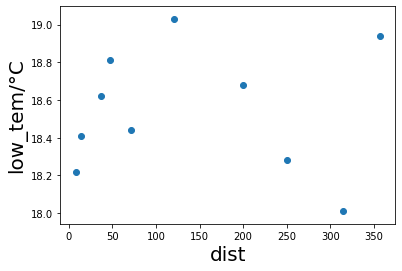

In [21]:
plt.scatter(lowtem_dist.index,lowtem_dist.values)
plt.xlabel('dist',fontdict=dict(fontsize=20))
plt.ylabel('low_tem/°C',fontdict=dict(fontsize=20))

最低湿度与海洋距离的关系

In [22]:
lowhum_dist=low_hum.merge(dist,left_index=True,right_index=True)
lowhum_dist=lowhum_dist.set_index('dist')
lowhum_dist

,humidity
dist,
315,29
71,40
14,61
37,61
47,39
121,28
250,35
200,35
8,34


Text(0, 0.5, 'low_hum')

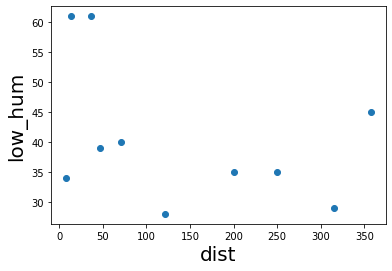

In [23]:
plt.scatter(lowhum_dist.index,lowhum_dist.values)
plt.xlabel('dist',fontdict=dict(fontsize=20))
plt.ylabel('low_hum',fontdict=dict(fontsize=20))

最高湿度与海洋距离的关系

In [24]:
higthum_dist=high_hum.merge(dist,left_index=True,right_index=True)
higthum_dist=higthum_dist.set_index('dist')
higthum_dist

,humidity
dist,
315,93
71,92
14,100
37,100
47,85
121,100
250,100
200,100
8,94


Text(0, 0.5, 'high_hum')

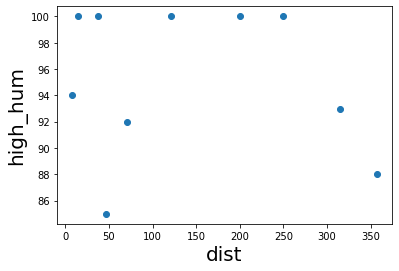

In [25]:
plt.scatter(higthum_dist.index,higthum_dist.values)
plt.xlabel('dist',fontdict=dict(fontsize=20))
plt.ylabel('high_hum',fontdict=dict(fontsize=20))

平均湿度与海洋距离的关系

In [26]:
mean_hum=all_data.groupby(by='dist')[['humidity']].mean()
mean_hum

,humidity
dist,
8,68.015152
14,77.647059
37,81.074627
47,61.308824
71,61.338235
121,59.147059
200,59.308824
250,56.984848
315,63.132353


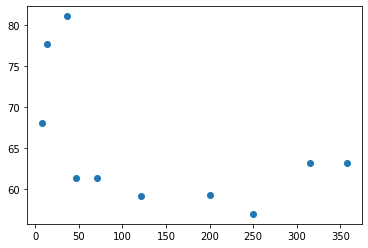

In [27]:
plt.scatter(mean_hum.index,mean_hum.values)

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

In [ ]:
from sklearn.svm import SVR
# svr1=SVR(kernel='poly',gamma='auto',C=10)
# svr1.fit(mean_hum.index.values.reshape(-1,1),mean_hum.values.ravel())
# x1=np.linspace(0,350,10).reshape((-1,1))
# x1_=svr1.predict(x1)
# plt.scatter(mean_hum.index,mean_hum.values)
# plt.plot(x1,x1_,'r')

风向与风速的关系

In [28]:
all_data.head(1)

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
Unnamed: 0,,,,,,,,,,
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315


In [29]:
speed=all_data['wind_speed']
degree=all_data['wind_deg']

Text(0, 0.5, 'degree')

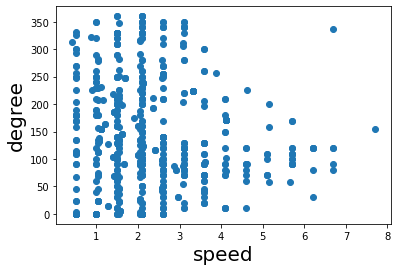

In [30]:
plt.scatter(speed,degree)
plt.xlabel('speed',fontdict=dict(fontsize=20))
plt.ylabel('degree',fontdict=dict(fontsize=20))

在子图中，同时比较风向与湿度和风力的关系

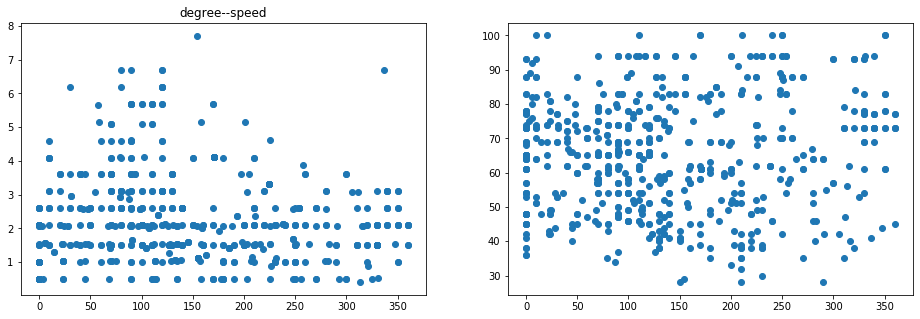

In [51]:
plt.figure(figsize=(8*2,5))
axes1=plt.subplot(1,2,1)
axes1.scatter(degree,speed)
axes1.set_title('degree--speed')
axes2=plt.subplot(1,2,2)
axes2=plt.scatter(degree,all_data['humidity'])

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

In [72]:
wind=all_data.loc[:,'wind_speed':'wind_deg']
wind

,wind_speed,wind_deg
Unnamed: 0,,
0,2.57,42.501
1,1.54,263.000
2,2.60,100.000
3,2.10,90.000
4,2.10,120.000
5,2.10,110.000
6,2.10,100.000
7,2.10,100.000
8,1.50,100.000


In [95]:
list1=[]
for i in range(1,9):
    a=wind.loc[(wind['wind_deg']<i*45) & ((i-1)*45<wind['wind_deg'])]['wind_speed'].mean()
    list1.append(a)
n1=np.array(list1)
n1

array([2.32919355, 2.79166667, 2.69612903, 2.54039474, 2.15183333,
       1.78849057, 1.8604    , 2.10652174])

<BarContainer object of 8 artists>

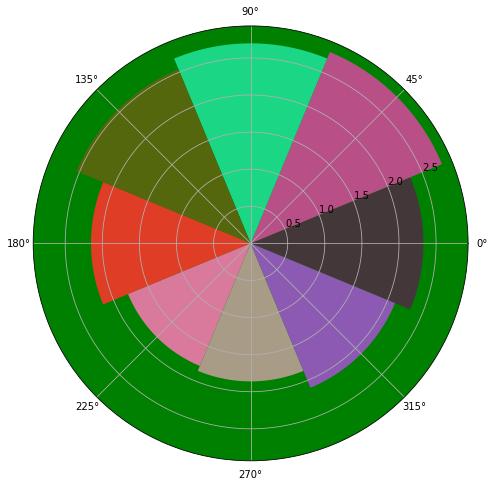

In [96]:
x=np.arange(0,2*np.pi,np.pi/4)
y=n1
plt.figure(figsize=(8,8))
plt.subplot(projection='polar',facecolor='g')
plt.bar(x,y,width=np.pi/4,color=np.random.rand(8,3))

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

<BarContainer object of 8 artists>

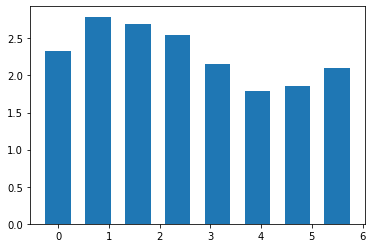

In [99]:
plt.bar(x,y,width=0.5)

计算米兰各个方向上的风速

In [104]:
all_data.loc[:,'city'].unique()

array(['Asti', 'Bologna', 'Cesena', 'Faenza', 'Ferrara', 'Mantova',
       'Milano', 'Piacenza', 'Ravenna', 'Torino'], dtype=object)

In [113]:
Mil_wind=all_data.loc[all_data['city']=='Milano']
Mil_wind.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
Unnamed: 0,,,,,,,,,,
407,28.57,54,1016.0,Sky is Clear,1436863175,2.1,100.0,Milano,2015-07-14 10:39:35,250
408,29.74,48,1016.0,Sky is Clear,1436866758,2.6,0.0,Milano,2015-07-14 11:39:18,250
409,31.12,48,1016.0,Sky is Clear,1436870509,2.6,140.0,Milano,2015-07-14 12:41:49,250
410,32.16,45,1015.0,Sky is Clear,1436874098,2.1,0.0,Milano,2015-07-14 13:41:38,250
411,33.59,43,1015.0,Sky is Clear,1436877644,3.1,80.0,Milano,2015-07-14 14:40:44,250


将各个方向的风速保存在列表中

In [117]:
list2=[]
for i in range(1,9):
    b=Mil_wind.loc[(Mil_wind['wind_deg']<i*45) & ((i-1)*45<Mil_wind['wind_deg'])]['wind_speed'].ipynb_checkpoints/mean()
    list2.append(b)
n2=np.array(list2)
n2

array([2.83333333, 2.22222222, 3.08333333, 2.58333333, 2.32857143,
       2.26666667, 1.5       , 2.1       ])

画出各个方向的风速

<BarContainer object of 8 artists>

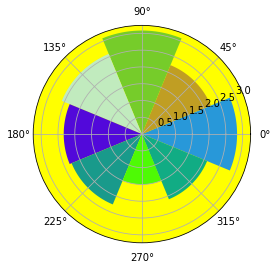

In [122]:
x=np.arange(0,2*np.pi,np.pi/4)
y=n2
plt.subplot(projection='polar',facecolor='yellow')
plt.bar(x,y,width=np.pi/4,color=np.random.rand(8,3))

将上面步骤写成函数

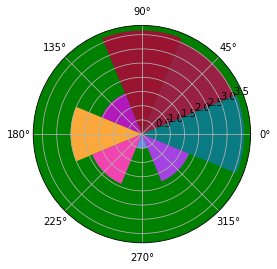

In [137]:
def get_ploar(city):
    title=city+'_wind'
    title=all_data.loc[all_data['city']==city]
    list2=[]
    for i in range(1,9):
        b=title.loc[(title['wind_deg']<i*45) & ((i-1)*45<title['wind_deg'])]['wind_speed'].mean()
        list2.append(b)
    y=np.array(list2)
    x=np.arange(0,2*np.pi,np.pi/4)
    plt.subplot(projection='polar',facecolor='g')
    plt.bar(x,y,width=np.pi/4,color=np.random.rand(8,3))
    return None

get_ploar('Cesena')